# Week 3

Homework for week 4: read ch4A, propose term project for approval by Oct 1

3.2 - Be familiar with notation & definitions

    - For mean they use
$$\mu = E(x)$$
    
    - The 4th moment, kurtosis, has a -3 in the definition because its normalized so the kurtosis gives 0 for a normal distribution
    
    - quantiles are essentially percentiles 
3.3 - Common distribution functions

    - Shifting and rescaling preserve type, skewness, kurtosis

### Uniform
$$p(x|\mu,W) = \frac{1}{W}$$ for $$|x-\mu| \leq \frac{W}{2}$$

e.g, photons hitting a CCD pixel

### Gaussian
Gaussian = Normal 
$$N(\mu,\sigma^2)$$
$$p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp{-(x-\mu)^2 / 2\sigma^2}$$

e.g, bell curve for many exam results

    - The convolution of 2 Gaussians is Gaussian, where the convolution is:
$$(fog)(x) = \int^{\infty}_{\infty} f(x')g(x-x')dx'$$

    - The Fourier transform of a Gaussian is Gaussian
    
    - Gaussian distribution with Gaussian measurement errors are a convolution, which adjusts the mean and sigma.
$$\mu = \mu_0 + b$$
$$\sigma_3 ^2 = \sigma_1 ^2 + \sigma_2 ^2$$
    
    - The CDF of a Gaussian:
$$P(x|\mu,\sigma) = \frac{1}{2}(1\pm erf(\frac{|x-\mu}{\sigma\sqrt{2}}))$$
    gives confidence intervals

### Binomial
    - Discrete, probability of success b, N trials, k successes
$$p(k|b,N) = \frac{N!}{k!(N-k)!}b^k(1-b)^{N-k}$$

### Poisson
    - Binomial, but in the limit
$$ N \to \infty$$
    or low probability of success
    
    - As mu goes to infinity, limit of Poisson is
$$ N(\mu, \sqrt{\mu})$$

$$ p(k|\mu) = \frac{\mu^k e^{-\mu}}{k!}$$

### Cauchy (Lorentzian)
$$p(x|\mu,\gamma) = \frac{1}{\pi \gamma}(\frac{\gamma^2}{\gamma^2 + (x-\mu)^2})$$
    - Moments become divergent, even the first moment. Hence measuring the mean many times will not converge to a single value.
    
    - Ratio of normally distributed variables
    

### Exponential (Laplace)
$$p(x|\mu,\Delta) = \frac{1}{2\Delta}\exp(-|x-\mu|/\Delta)$$
    - More well-behaved than Cauchy, try exponential before Cauchy!
    
    - Difference between normally distributed variables (e.g, time between photon detections from continuous sources)

### Chi-squared
    - For Gaussian-sampled data, define
$$z_i = (x_i - \mu)/\sigma$$
    and the sum
$$Q = \sum z_i ^2$$
    follows a chi-squared distribution
$$p(Q|k) = \chi^2(Q|k) = \frac{1}{2^{k/2} \Gamma(k/2)}Q^{k/2 - 1} e^{-Q/2}$$
    - Rule of thumb
$$\chi^2 \to N(1, \sqrt{2/k})$$
as
$$k \to \infty$$
    e.g, for 10 degrees of freedom, chi-squared is roughly 10 

### Student's t
    - The ratio of a normal variable to a chi-squared distributed variable
    
    - Used to compare means between two samples
    
### Fisher's F
    - Ratio of two independent chi-squared d.o.f. variables drawn from d1 and d2 degrees of freedom

## Central Limit Theorem
    - For an arbitrary distribution, h(x), that has a mean and standard deviation, as the number of values you draw, N, goes to infinity, the mean of N goes to a normal distribution:
$$\mu(N) \to N(\mu, \sigma/\sqrt{N})$$
    
    - The CLM is not guaranteed to apply to distributions without mean, sigma e.g, Cauchy

## Multivariate Distribution Functions
    - Consider two values measured, xi and yi drawn from h(x,y) gives
$$p(x_i \in (x,x+dx), y_i \in (y,y+dy)) $$
    normalized to 1
    
    - The covariance
$$Cov(x,y) = V_{xy} = \int \int (x-\mu_x)(y-\mu_y)h(x,y)dxdy$$
    where $\mu_x$ etc are also doubly integrated
    
    - There is no covariance iff
$$\sigma_{xy} = 0, h(x,y) = h(x)h(y)$$
    otherwise
$$\sigma^2(z=x+y) = \sigma_x^2 + \sigma_y^2 + 2\sigma_{xy}$$

### 2-D Gaussian
$$p(x,y|\mu_x,\mu_y,\sigma_x,\sigma_y,\sigma_{xy}) = \frac{1}{2\pi \sigma_x\sigma_y\sqrt{1-\rho^2}} = e^{-\frac{-z^2}{2(1-\rho^2)}}$$
    where
$$\rho = \frac{\sigma_{xy}}{\sigma_x\sigma_y}$$
    is the dimensionless correlation coefficient
    and
$$z = \frac{(x-\mu_x)^2}{\sigma_x^2}\frac{(y-\mu_y)^2}{\sigma_y^2} - \frac{2\rho (x-\mu_x)(y-\mu_y)}{\sigma_x\sigma_y}$$
    
    - Notice this works as expected for $\rho = 0$, but not for plus or minus 1
    
    - Marginal distributions are standard 1D Gaussians independent of covariance
    
### Contours
    - Contours of equal probability are ellipses with
$$\tan(2\alpha) = 2\frac{\sigma_{xy}}{\sigma_x^2 - \sigma_y^2}$$
    for tilt $\alpha$.

    - Can define uncorrelated variables on principal axes P1 and P2 with new standard deviations.
    
    - This gives us a product of univariate Gaussians in P1 and P2, and let us generate mock samples drawn from a bivariate Gaussian.
    
    - Given a 2D data distribution with scatter much greater than the measurement errors, we can estimate a bivariate Gaussian distribution using section 3.5.3, fitting 5 parameters
    
    - If your data is not actually bivariate Gaussian distributed (has many outliers), then a robust fit would likely use the median and interquartile ranges)
    
    - Can also find principal axes with Pearson r

# Hack

## Hack 1 - Trees

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import cKDTree

In [8]:
from astroML.datasets import fetch_sdss_S82standards

data = fetch_sdss_S82standards()

In [82]:
g = data['mmu_g']
r = data['mmu_r']
i = data['mmu_i']

gmr = (g-r)[:10000]
rmi = (r-i)[:10000]

In [83]:
coords = np.array([gmr,rmi]).T


obj_ix = (gmr > 1.5)&(rmi < 0)
coords_obj = coords[obj_ix]

def find_neighbor_tree(coords, coords_obj):
    tree = cKDTree(coords)
    nearest = tree.query(coords_obj, 2)
    ix = nearest[1][0][1]
    return ix

def find_neighbor_brute(coords, coords_obj):
    distance = []
    for coord in coords:
        distance += [np.linalg.norm(coord - coords_obj)]
    distance = np.asarray(distance)
    ix = np.argmin(distance[distance > 0])
    return ix

Find nearest neighbor with cKDTree

In [84]:
%%timeit
ix = find_neighbor_tree(coords, coords_obj)

3.63 ms ± 118 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Find nearest neighbor with brute force

In [85]:
%%timeit
ix = find_neighbor_brute(coords, coords_obj)

82.7 ms ± 1.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


It takes approximately 22 times longer for the brute-force technique for N=10,000 points

Text(0.5,0,'g-r')

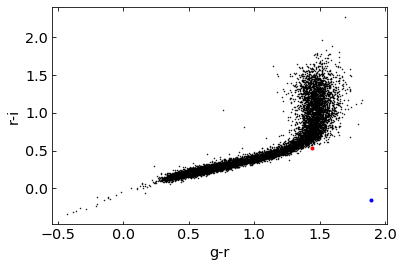

In [74]:
ix = find_neighbor_tree(coords, coords_obj)

plt.plot(gmr, rmi, 'k.', ms=1)
plt.plot(gmr[obj_ix], rmi[obj_ix], 'bo', ms=3)
plt.plot(gmr[ix], rmi[ix], 'ro', ms=3)
plt.ylabel('r-i')
plt.xlabel('g-r')

## Hack 2 - Monty Hall Monte Carlo

Bayes' Rule solution for N=3:
    The probability the prize is in the first box:
$$p(H_1\mid d_k, I) = \frac{p(d_k \mid H_1,I)p(H_1\mid I)}{p(d_k\mid I)}$$
    which turns out to be:
$$p(H_1 \mid d_k, I) = \frac{1}{N} = \frac{1}{3}$$.
    The probability the prize is rather in the unopened box, box k:
$$p(H_k \mid d_k, I) = \frac{N-1}{N} = \frac{2}{3}$$

Now let's verify with a Monte Carlo method:

In [165]:
class MHMC:
    def __init__(self, N=3, careful=True, trials=100):
        self.N = N
        self.careful = careful
        self.trials = trials
    
    def montecarlo(self):
        results = np.array([self.run_instance() for trial in range(self.trials)]).T
        prob_door1 = sum(results[0]) / len(results[0])
        prob_door2 = sum(results[1]) / len(results[1])
        print('Probability of choosing the correct door the first time:', prob_door1)
        print('Probability of choosing the correct door after switching:', prob_door2)
        
    def run_instance(self):
        doors = self.inst_doors()
        prize_door = self.choose_door()
        chosen_door = self.choose_door()
        unopened_door = self.host_open_doors(prize_door, chosen_door)
        choice1 = chosen_door == prize_door
        choice2 = unopened_door == prize_door
        return [choice1, choice2]
    
    def inst_doors(self):
        doors = np.zeros(self.N)
        return doors
    
    def choose_door(self):
        chosen_door = np.random.randint(0,self.N)
        return chosen_door
    
    def host_open_doors(self, prize_door, chosen_door):
        num_draws = 0
        if self.careful:
            available_doors = np.setdiff1d(range(0,self.N), [chosen_door, prize_door])
        else:
            available_doors = np.setdiff1d(range(0,self.N), chosen_door)
        
        while num_draws < N - 2:
            opened_doors = np.random.choice(available_doors)
            available_doors = np.setdiff1d(available_doors, opened_doors)
            num_draws += 1
        unopened_door = np.setdiff1d(range(0,self.N), [chosen_door,opened_doors])
        
        return unopened_door[0]


In [174]:
MHMC(trials=10000, careful=True).montecarlo()

Probability of choosing the correct door the first time: 0.3331
Probability of choosing the correct door after switching: 0.6669


In [175]:
MHMC(trials=10000, careful=False).montecarlo()

Probability of choosing the correct door the first time: 0.3272
Probability of choosing the correct door after switching: 0.3313
